# Домашнее задание №1: линейная регрессия (максимум 10 баллов)

Некоторые задания будут по вариантам (всего 4 варианта). Чтобы выяснить свой вариант, посчитайте количество букв в своей фамилии, возьмете остаток от деления на 4 и прибавьте 1.

In [6]:
# Вариант 2

import numpy as np
import matplotlib.pyplot as plt

## Многомерная линейная регрессия из sklearn

Создадим набор данных для многомерной регрессии

In [3]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples = 10000)
print(X.shape, y.shape)

(10000, 100) (10000,)


У нас 10000 объектов и 100 признаков. Для начала решим задачу аналитически "из коробки".

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(X, y)
print(mean_squared_error(y, reg.predict(X)))

1.8458987118156722e-25


Теперь попробуем обучить линейную регрессию методом градиентного спуска "из коробки"

In [ ]:
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(alpha=0.00000001).fit(X, y)
print(mean_squared_error(y, reg.predict(X)))
reg.coef_

4.930033651729786e-12


array([-1.40519140e-08,  5.79857012e-08, -6.71754502e-09,  5.37196565e-08,
       -4.23757401e-08,  3.15550399e-08,  2.05143147e-08,  2.43603302e-08,
       -1.83651435e-08,  1.08013656e-08,  4.09452086e-10,  3.37285401e-08,
        1.35102227e-08,  1.01480658e-08, -2.43482053e-08,  6.40744926e-09,
        3.06382456e-08,  3.86017978e-08,  3.41564997e+01, -5.18518032e-08,
        1.38851391e-08, -1.42306529e-08,  4.25270696e-08, -4.06081084e-08,
       -2.59950367e-08, -2.74756585e-08,  4.99694106e-08,  2.77403421e-08,
        8.67942327e+01, -5.09177475e-08,  4.93540495e-08,  2.75812943e-08,
        2.61001097e-08,  1.82849413e-08,  3.40308818e-08,  5.20034871e-10,
       -1.94357651e-09, -3.78890156e-08,  8.64190655e-09, -4.20037313e-08,
       -1.60387918e-08, -7.31952433e-08, -6.50953752e-09, -5.59987250e-08,
        7.78720755e-09,  3.09553018e-08, -5.26316915e-08,  5.29849158e+01,
       -9.07206447e-09,  3.17915348e-08, -3.52596728e-08, -4.22117966e-08,
       -3.71200144e-09, -

***Задание 1 (1 балл).*** Объясните, чем вызвана разница в значениях двух полученных значений метрики?

**Ответ**: Разница в MSE может быть вызвана тем, что обучение модели с помощью LinearRegression и SGDRegression происходит разными способами. В LinearRegression используется МНК, а в SGDRegression используется метод стохастического градиентного спуска. Также свою роль игроает и число итераций - Если в SGDRegressor задано недостаточное количество итераций (например, max_iter), то модель может не успеть достаточно адаптироваться к данным, что также приведет к высокому MSE.

***Задание 2 (1 балл).*** Подберите гиперпараметры в методе градиентного спуска так, чтобы значение MSE было близко к значению MSE, полученному при обучении LinearRegression.

In [5]:
# Задание 2

mse_values = []

# Перебираем различные значения alpha и learning_rate
for alpha in [1e-10, 1e-9, 1e-8]:
    for learning_rate in ['constant', 'optimal', 'invscaling']:
        # Создаем регрессор с текущими гиперпараметрами
        reg = SGDRegressor(alpha=alpha, learning_rate=learning_rate, max_iter=10000, tol=1e-3)
        reg.fit(X, y)
        
        # Предсказание и вычисление MSE
        mse = mean_squared_error(y, reg.predict(X))
        mse_values.append((alpha, learning_rate, mse))

# Находим гиперпараметры, которые дают наименьшее значение MSE
best_params = min(mse_values, key=lambda x: x[2])
print(f"Лучшие гиперпараметры: alpha={best_params[0]}, learning_rate={best_params[1]}, MSE={best_params[2]}")

Лучшие гиперпараметры: alpha=1e-10, learning_rate=invscaling, MSE=2.6119082972777367e-16


## Ваша многомерная линейная регрессия

***Задание 3 (5 баллов)***. Напишите собственную многомерную линейную регрессию, оптимизирующую MSE методом *градиентного спуска*. Для этого используйте шаблонный класс.

Критерий останова: либо норма разности весов на текущей и предыдущей итерациях меньше определенного значения (первый и третий варианты), либо модуль разности функционалов качества (MSE) на текущей и предыдущей итерациях меньше определенного значения (второй и четвертый варианты). Также предлагается завершать обучение в любом случае, если было произведено слишком много итераций.

***Задание 4 (2 балла)***. Добавьте l1 (первый и четвертый варианты) или l2 (второй и третий варианты) регуляризацию.

In [19]:
# Описание класса модели линейной регрессии (Задание 3)

class LinearRegression(object):
    def __init__(self, alpha=0.0001, l_ratio=0.001, tol=0.001, max_iter=1000):
        '''
        Для начала необходимо инициализировать параметры
        alpha - это learning rate или шаг обучения
        l_ratio - параметр регуляризации
        tol - значение для критерия останова
        max_iter - максимальное количество итераций обучения
        '''
        self.alpha = alpha
        self.l_ratio = l_ratio
        self.tol = tol
        self.max_iter = max_iter
        self.weights = None

    def fit(self, X, y):
        '''
        Метод для обучения линейной регрессии
        X - матрица признаков
        y - вектор правильных ответов
        '''
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        previous_mse = float('inf')
        
        for iteration in range(self.max_iter):
            y_pred = np.dot(X, self.weights)
            error = y_pred - y
            gradient = (1/n_samples) * np.dot(X.T, error) + self.l_ratio * self.weights
            new_weights = self.weights - self.alpha * gradient
            mse = np.mean((y_pred - y) ** 2)
            
            if abs(mse - previous_mse) < self.tol:
                print(f"Критерий остановы был удовлетворен на итерации: {iteration}. Изменение MSE ниже уровня {self.tol}.")
                break
            
            self.weights = new_weights
            previous_mse = mse
            
        else:
            print(f"Достигнуто максимальное кол-во итераций: {self.max_iter}.")
            

    def predict(self, X):
        '''
        Метод для предсказаний линейной регрессии
        X - матрица признаков
        '''
        if self.weights is None:
            raise Exception("Модель еще не обучена, воспользуйтесь методом 'fit()'")
    
        return np.dot(X, self.weights)

Критерий остановы был удовлетворен на итерации: 711. Изменение MSE ниже уровня 0.001.


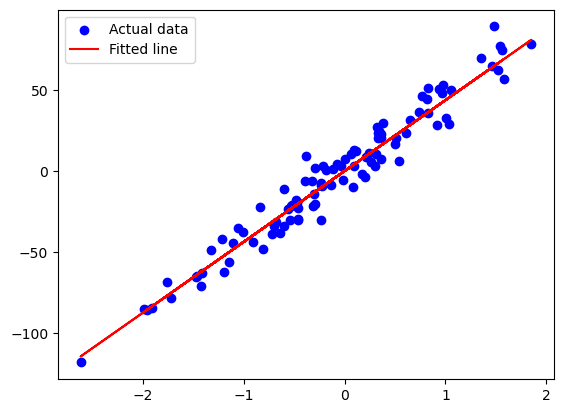

In [21]:
# Демонстрация работы модели на синтетических данных

# Генерация синтетических данных
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Инициализация и обучение модели
model = LinearRegression(alpha=0.01, l_ratio=0.01, tol=0.001, max_iter=10000)
model.fit(X, y)

# Предсказание
predictions = model.predict(X)

# Визуализация результатов
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, predictions, color='red', label='Fitted line')
plt.legend()
plt.show()

In [25]:
# Задание 4 - Добавление L2-регуляризации

class CustomRidgeRegression(object):
    def __init__(self, alpha=0.0001, l_ratio=0.001, tol=0.001, max_iter=1000):
        '''
        Инициализация параметров модели.
        alpha - шаг обучения
        l_ratio - параметр регуляризации (L2)
        tol - значение для критерия останова
        max_iter - максимальное количество итераций обучения
        '''
        self.alpha = alpha
        self.l_ratio = l_ratio
        self.tol = tol
        self.max_iter = max_iter
        self.weights = None

    def fit(self, X, y):
        '''
        Метод для обучения линейной регрессии.
        X - матрица признаков
        y - вектор правильных ответов
        '''
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        previous_mse = float('inf')
        
        for iteration in range(self.max_iter):
            y_pred = np.dot(X, self.weights)
            error = y_pred - y
            
            # Вычисление градиента с L2-регуляризацией
            gradient = (1/n_samples) * np.dot(X.T, error) + (self.l_ratio / n_samples) * self.weights
            
            new_weights = self.weights - self.alpha * gradient
            mse = np.mean((y_pred - y) ** 2) + (self.l_ratio / (2 * n_samples)) * np.sum(self.weights ** 2)  # Функция потерь с L2-регуляризацией
            
            if abs(mse - previous_mse) < self.tol:
                print(f"Критерий остановы был удовлетворен на итерации: {iteration}. Изменение MSE ниже уровня {self.tol}.")
                break
            
            self.weights = new_weights
            previous_mse = mse
            
        else:
            print(f"Достигнуто максимальное кол-во итераций: {self.max_iter}.")

    def predict(self, X):
        '''
        Метод для предсказаний линейной регрессии.
        X - матрица признаков
        '''
        if self.weights is None:
            raise Exception("Модель еще не обучена, воспользуйтесь методом 'fit()'")
    
        return np.dot(X, self.weights)

Критерий остановы был удовлетворен на итерации: 616. Изменение MSE ниже уровня 0.001.


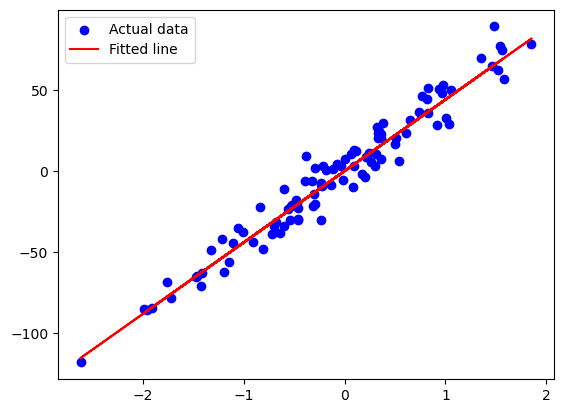

In [26]:
# Демонстрация работы модели на синтетических данных - теперь с L2-регуляризацией

# Генерация синтетических данных
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Инициализация и обучение модели
model = CustomRidgeRegression(alpha=0.01, l_ratio=0.01, tol=0.001, max_iter=1000)
model.fit(X, y)

# Предсказание
predictions = model.predict(X)

# Визуализация результатов
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, predictions, color='red', label='Fitted line')
plt.legend()
plt.show()

***Задание 5 (1 балл)***. Обучите линейную регрессию из коробки с l1-регуляризацией (from sklearn.linear_model import Lasso, первый и четвертый варианты) или с l2-регуляризацией (from sklearn.linear_model import Ridge, второй и третий варианты) с значением параметра регуляризации 0.1. Обучите вашу линейную регрессию с тем же значением параметра регуляризации и сравните результаты. Сделайте выводы.

Ridge (sklearn) MSE: 78.0567
Custom L2 Regression MSE: 79.4727


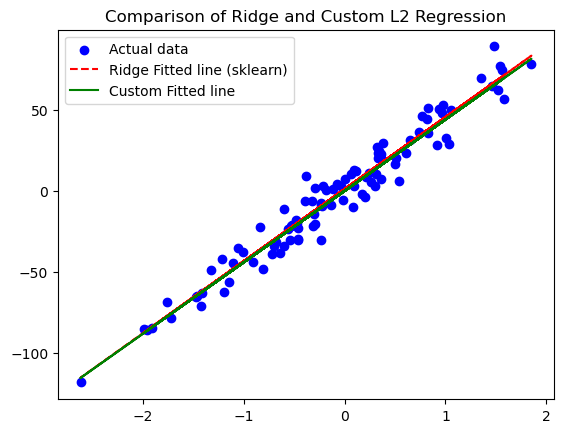

In [28]:
# Задание 5

from sklearn.linear_model import Ridge

# Генерация синтетических данных
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Обучение модели с L2-регуляризацией (Ridge) из scikit-learn
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X, y)
ridge_predictions = ridge_model.predict(X)
ridge_mse = mean_squared_error(y, ridge_predictions)

# Обучение кастомной модели (описана в предыдущем задании) с L2-регуляризацией
custom_model = CustomRidgeRegression(alpha=0.01, l_ratio=0.1)
custom_model.fit(X, y)
custom_predictions = custom_model.predict(X)
custom_mse = mean_squared_error(y, custom_predictions)

print(f"Ridge (sklearn) MSE: {ridge_mse:.4f}")
print(f"Custom L2 Regression MSE: {custom_mse:.4f}")

plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, ridge_predictions, color='red', label='Ridge Fitted line (sklearn)', linestyle='--')
plt.plot(X, custom_predictions, color='green', label='Custom Fitted line', linestyle='-')
plt.legend()
plt.title('Сравнение Ridge и Кастомной модели регрессии')
plt.show()

**Выводы:**

Значения MSE для обеих моделей близки, что указывает на то, что моя кастомная реализация линейной регрессии с L2-регуляризацией функционирует корректно и может эффективно обучаться на данных.

Модель Ridge, реализованная в scikit-learn, показала немного лучшее значение MSE, чем кастомная модель. Это может свидетельствовать о том, что стандартная реализация использует более оптимизированные методы и настройки по умолчанию, что делает её более эффективной (так и должно быть, библиотека scikit-learn все-таки сделана умными людьми).